In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import io
import time
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
start_time=time.time()
data=pd.read_csv('iris_1.csv')
print(data[:5])
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]
print(x.shape,y.shape)
plt.scatter(data['sepal.length'],data['sepal.width'],c='red')
x=StandardScaler().fit_transform(x)
print(x[:5])
pca1=decomposition.PCA(n_components=2)
pca_data=pca1.fit_transform(x)
print(pca_data.shape)
print(pca_data[:5])
print(pca1.explained_variance_)
percentage_var=pca1.explained_variance_/np.sum(pca1.explained_variance_)
cumulative_var=np.cumsum(percentage_var)
print(percentage_var)
print(cumulative_var)
pca_df=pd.DataFrame(data=pca_data,columns=['PC1','PC2'])
pca_df['variety']=y
target_color={'Setosa':'red','Versicolor':'blue','Virginica':'green'}

plt.figure(figsize=(8,6))
for species,color1 in target_color.items():
    subset=pca_df[pca_df['variety']==species]
    plt.scatter(subset['PC1'],subset['PC2'],label=species,color=color1)

eigen_vector=pca1.components_
mean_x,mean_y=np.mean(pca_data,axis=0)

pc_color=['red','black']
for i in range(2):
    plt.arrow(0,0,
              eigen_vector[i,0]*2,
              eigen_vector[i,1]*2,
              color=pc_color[i],
              head_width=0.1,
              label=f'PC{i+1}'
             )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of iris dataset with principal axes')
plt.legend()
plt.grid(True)
plt.show()

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
(150, 4) (150,)
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
(150, 2)
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]
[2.93808505 0.9201649 ]
[0.76150718 0.23849282]
[0.76150718 1.        ]


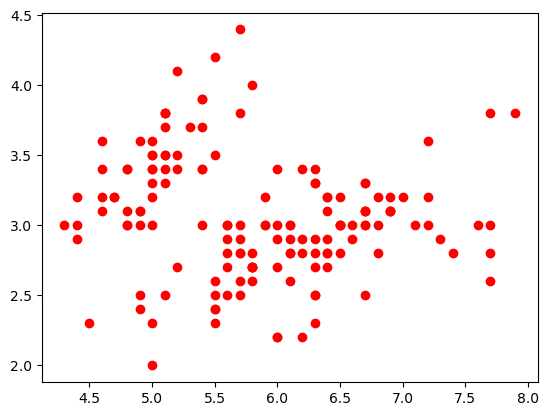

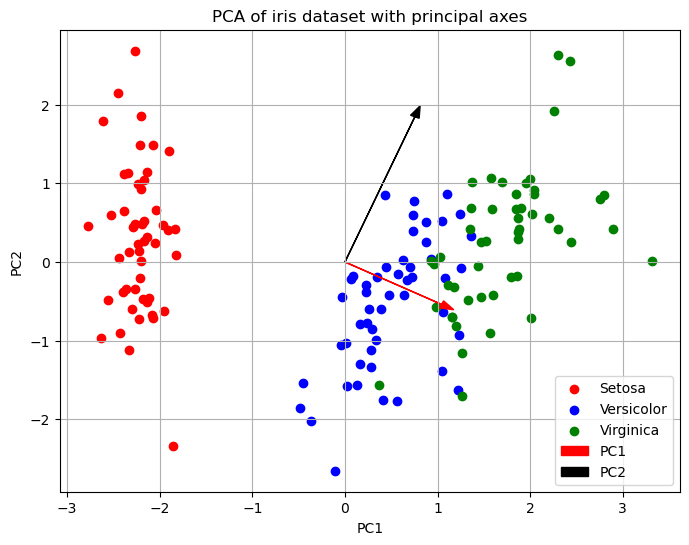